In [75]:
import pandas as pd
import numpy as np

In [103]:
path = "C:\\Users\\Vijay\\Downloads\\sample_sales_data.csv"
df = pd.read_csv(path)
df.head()  

,Unnamed: 0,transaction_id,timestamp,product_id,category,customer_type,unit_price,quantity,total,payment_type
0,0,a1c82654-c52c-45b3-8ce8-4c2a1efe63ed,2022-03-02 09:51:38,3bc6c1ea-0198-46de-9ffd-514ae3338713,fruit,gold,3.99,2,7.98,e-wallet
1,1,931ad550-09e8-4da6-beaa-8c9d17be9c60,2022-03-06 10:33:59,ad81b46c-bf38-41cf-9b54-5fe7f5eba93e,fruit,standard,3.99,1,3.99,e-wallet
2,2,ae133534-6f61-4cd6-b6b8-d1c1d8d90aea,2022-03-04 17:20:21,7c55cbd4-f306-4c04-a030-628cbe7867c1,fruit,premium,0.19,2,0.38,e-wallet
3,3,157cebd9-aaf0-475d-8a11-7c8e0f5b76e4,2022-03-02 17:23:58,80da8348-1707-403f-8be7-9e6deeccc883,fruit,gold,0.19,4,0.76,e-wallet
4,4,a81a6cd3-5e0c-44a2-826c-aea43e46c514,2022-03-05 14:32:43,7f5e86e6-f06f-45f6-bf44-27b095c9ad1d,fruit,basic,4.49,2,8.98,debit card


In [104]:
df.drop(columns=["Unnamed: 0"], inplace=True, errors='ignore')
df.head()

,transaction_id,timestamp,product_id,category,customer_type,unit_price,quantity,total,payment_type
0,a1c82654-c52c-45b3-8ce8-4c2a1efe63ed,2022-03-02 09:51:38,3bc6c1ea-0198-46de-9ffd-514ae3338713,fruit,gold,3.99,2,7.98,e-wallet
1,931ad550-09e8-4da6-beaa-8c9d17be9c60,2022-03-06 10:33:59,ad81b46c-bf38-41cf-9b54-5fe7f5eba93e,fruit,standard,3.99,1,3.99,e-wallet
2,ae133534-6f61-4cd6-b6b8-d1c1d8d90aea,2022-03-04 17:20:21,7c55cbd4-f306-4c04-a030-628cbe7867c1,fruit,premium,0.19,2,0.38,e-wallet
3,157cebd9-aaf0-475d-8a11-7c8e0f5b76e4,2022-03-02 17:23:58,80da8348-1707-403f-8be7-9e6deeccc883,fruit,gold,0.19,4,0.76,e-wallet
4,a81a6cd3-5e0c-44a2-826c-aea43e46c514,2022-03-05 14:32:43,7f5e86e6-f06f-45f6-bf44-27b095c9ad1d,fruit,basic,4.49,2,8.98,debit card


In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7829 entries, 0 to 7828
Data columns (total 9 columns):
transaction_id    7829 non-null object
timestamp         7829 non-null object
product_id        7829 non-null object
category          7829 non-null object
customer_type     7829 non-null object
unit_price        7829 non-null float64
quantity          7829 non-null int64
total             7829 non-null float64
payment_type      7829 non-null object
dtypes: float64(2), int64(1), object(6)
memory usage: 550.6+ KB


In [79]:
df.category.unique()

array(['fruit', 'vegetables', 'refrigerated items', 'frozen',
       'spices and herbs', 'canned foods', 'packaged foods',
       'condiments and sauces', 'beverages', 'dairy', 'cheese', 'meat',
       'seafood', 'baked goods', 'baking', 'snacks', 'baby products',
       'pets', 'personal care', 'medicine', 'kitchen',
       'cleaning products'], dtype=object)

In [80]:
df.payment_type.unique()

array(['e-wallet', 'debit card', 'cash', 'credit card'], dtype=object)

In [81]:
df.describe()

,unit_price,quantity,total
count,7829.000000,7829.000000,7829.000000
mean,7.819480,2.501597,19.709905
std,5.388088,1.122722,17.446680
min,0.190000,1.000000,0.190000
25%,3.990000,1.000000,6.570000
50%,7.190000,3.000000,14.970000
75%,11.190000,4.000000,28.470000
max,23.990000,4.000000,95.960000


In [82]:
import seaborn as sns

Exploratory Data Analysis

In [83]:
# plot_continuous_distribution = this is to visualise the distribution of numeric columns

def plot_continuous_distribution(data: pd.DataFrame = None, column: str = None, height: int = 8):
  _ = sns.displot(data, x=column, kde=True, height=height, aspect=height/5).set(title=f'Distribution of {column}');

# get_unique_values = this is to show how many unique values are present within a column

def get_unique_values(data, column):
  num_unique_values = len(data[column].unique())
  value_counts = data[column].value_counts()
  print(f"Column: {column} has {num_unique_values} unique values\n")
  print(value_counts)
    
# - plot_categorical_distribution = this is to visualise the distribution of categorical columns

def plot_categorical_distribution(data: pd.DataFrame = None, column: str = None, height: int = 8, aspect: int = 2):
  _ = sns.catplot(data=data, x=column, kind='count', height=height, aspect=aspect).set(title=f'Distribution of {column}');

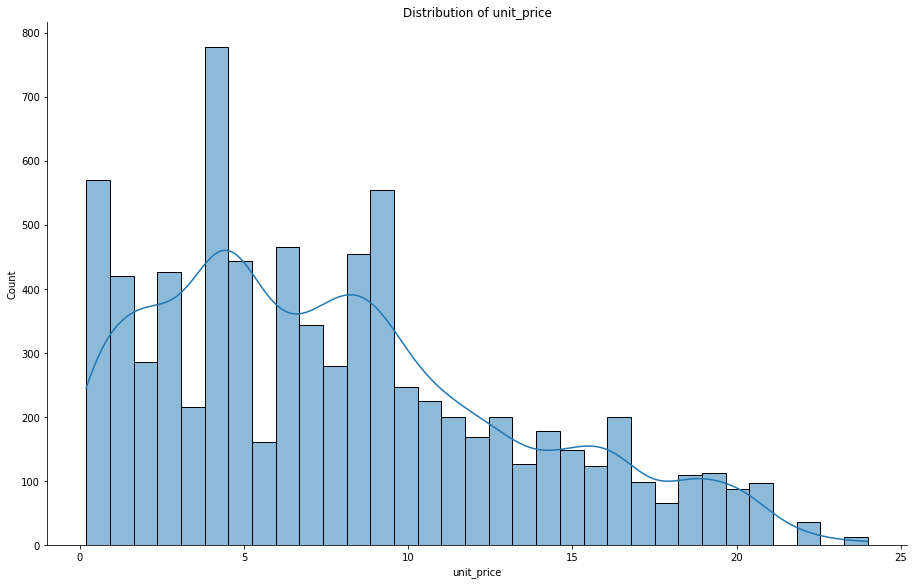

In [84]:
plot_continuous_distribution(df, 'unit_price')

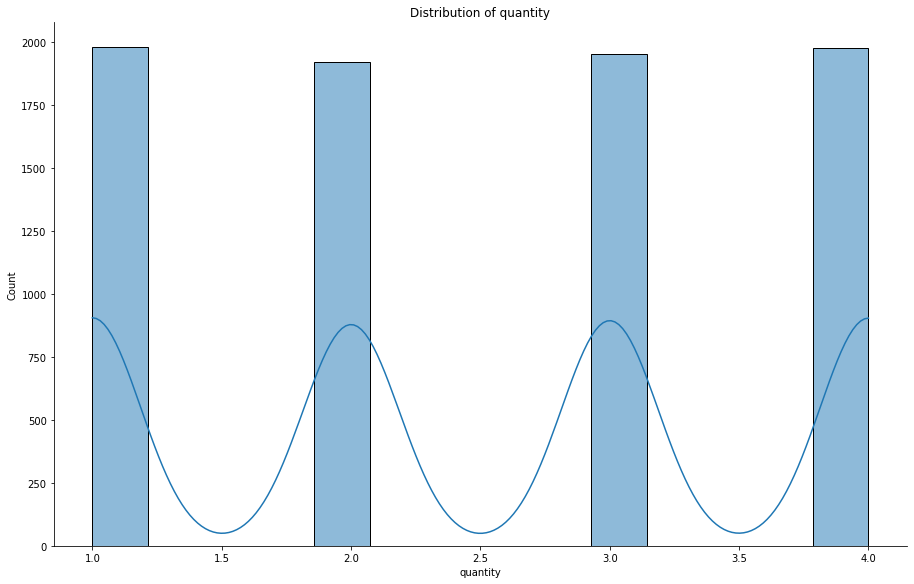

In [85]:
plot_continuous_distribution(df, 'quantity')

This tell us that the distribution of unit_price is positively skewed, that is, there are more sales of products with a low unit_price compared to products with a high unit_price.

This makes sense, you would expect a grocery store to sell more products that are cheap, and just a few products that are really expensive.

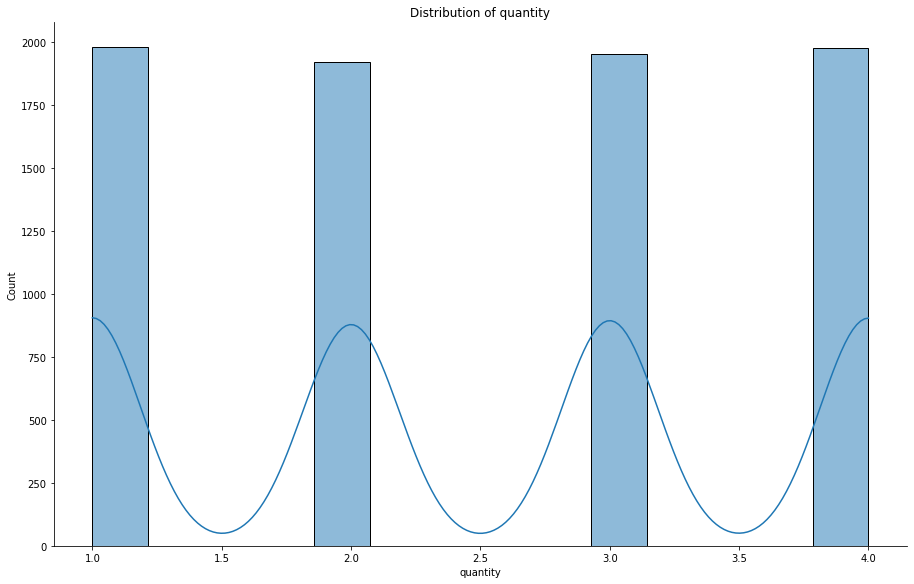

In [86]:
plot_continuous_distribution(df, 'quantity')

The distribution of quantity is very different. We can see that only 4 unique values exist (1, 2, 3, and 4) and they are quite evenly distributed. It seems as though customers are buying in even quantities across 1 to 4 units

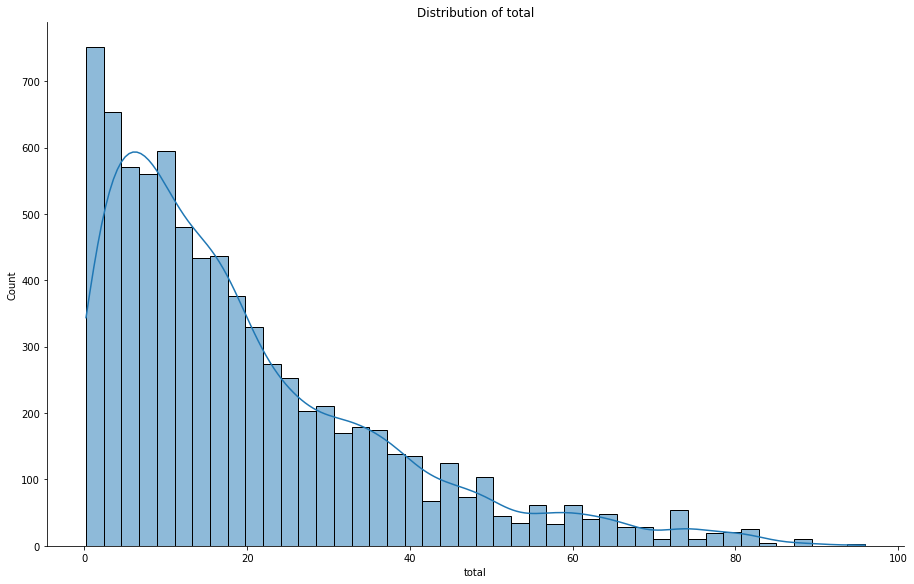

In [87]:
plot_continuous_distribution(df, 'total')

The total follows a similar distribution to unit_price. This you may expect, as the total is calculated as unit_price x quantity.

However, this distribution is even more positively skewed. Once again, using intuition, this distribution makes sense. You'd expect customers at a grocery store to generally make more transactions of low value and only occasionally make a transaction of a very high value.

Now let's turn our attention to the categorical columns within the dataset.

Before visualising these columns, it is worth us understanding how many unique values these columns have. If a categorical column has 1000's of unique values, it will be very difficult to visualise.

In [88]:
#As both the Transaction ID and Product ID has many unqiue values so we cannot make use of these 2 columns as these are not effective for the visualization
get_unique_values(df, 'transaction_id')
get_unique_values(df, 'product_id')

Column: transaction_id has 7829 unique values

99d3ee2c-8183-42c3-80e2-92e0176140e3    1
b472456a-a0de-4af1-b679-3a82a677b4b1    1
89121d27-a962-440c-92e8-3e421f627b42    1
447ca44a-ef42-4ffe-bb50-bd7afd9b9764    1
23ee71ac-6dfa-411b-9990-46a5ec6d2865    1
                                       ..
5ba294e5-efcf-4f20-83a4-f86f706b6e0b    1
ede531b4-f579-4ffd-8908-c44363f880f4    1
3301477b-3c11-4ba0-90a2-42ea5bd89e80    1
31ac5899-a480-4b01-99d2-6393aeb72c7d    1
2ab2e37e-4efa-4b5f-900b-7d743403c729    1
Name: transaction_id, Length: 7829, dtype: int64
Column: product_id has 300 unique values

ecac012c-1dec-41d4-9ebd-56fb7166f6d9    114
80da8348-1707-403f-8be7-9e6deeccc883    109
0ddc2379-adba-4fb0-aa97-19fcafc738a1    108
7c55cbd4-f306-4c04-a030-628cbe7867c1    104
3bc6c1ea-0198-46de-9ffd-514ae3338713    101
                                       ... 
5adfc643-aa8e-4140-b2c3-98a946444632      5
a8fab83a-16d4-4db0-a83a-f824ecd8604a      5
c8de27d0-2c44-4b5a-b178-59c45d054ccb      5
49f7

In [89]:
get_unique_values(df, 'category')

Column: category has 22 unique values

fruit                    998
vegetables               846
packaged foods           507
baked goods              443
canned foods             431
refrigerated items       425
meat                     382
kitchen                  382
dairy                    375
beverages                301
cheese                   293
cleaning products        292
baking                   264
snacks                   263
frozen                   263
seafood                  253
medicine                 243
baby products            224
condiments and sauces    181
personal care            177
pets                     161
spices and herbs         125
Name: category, dtype: int64


There are 22 unique values for category, with fruit and vegetables being the 2 most frequently purchased product categories and spices and herbs being the least. 

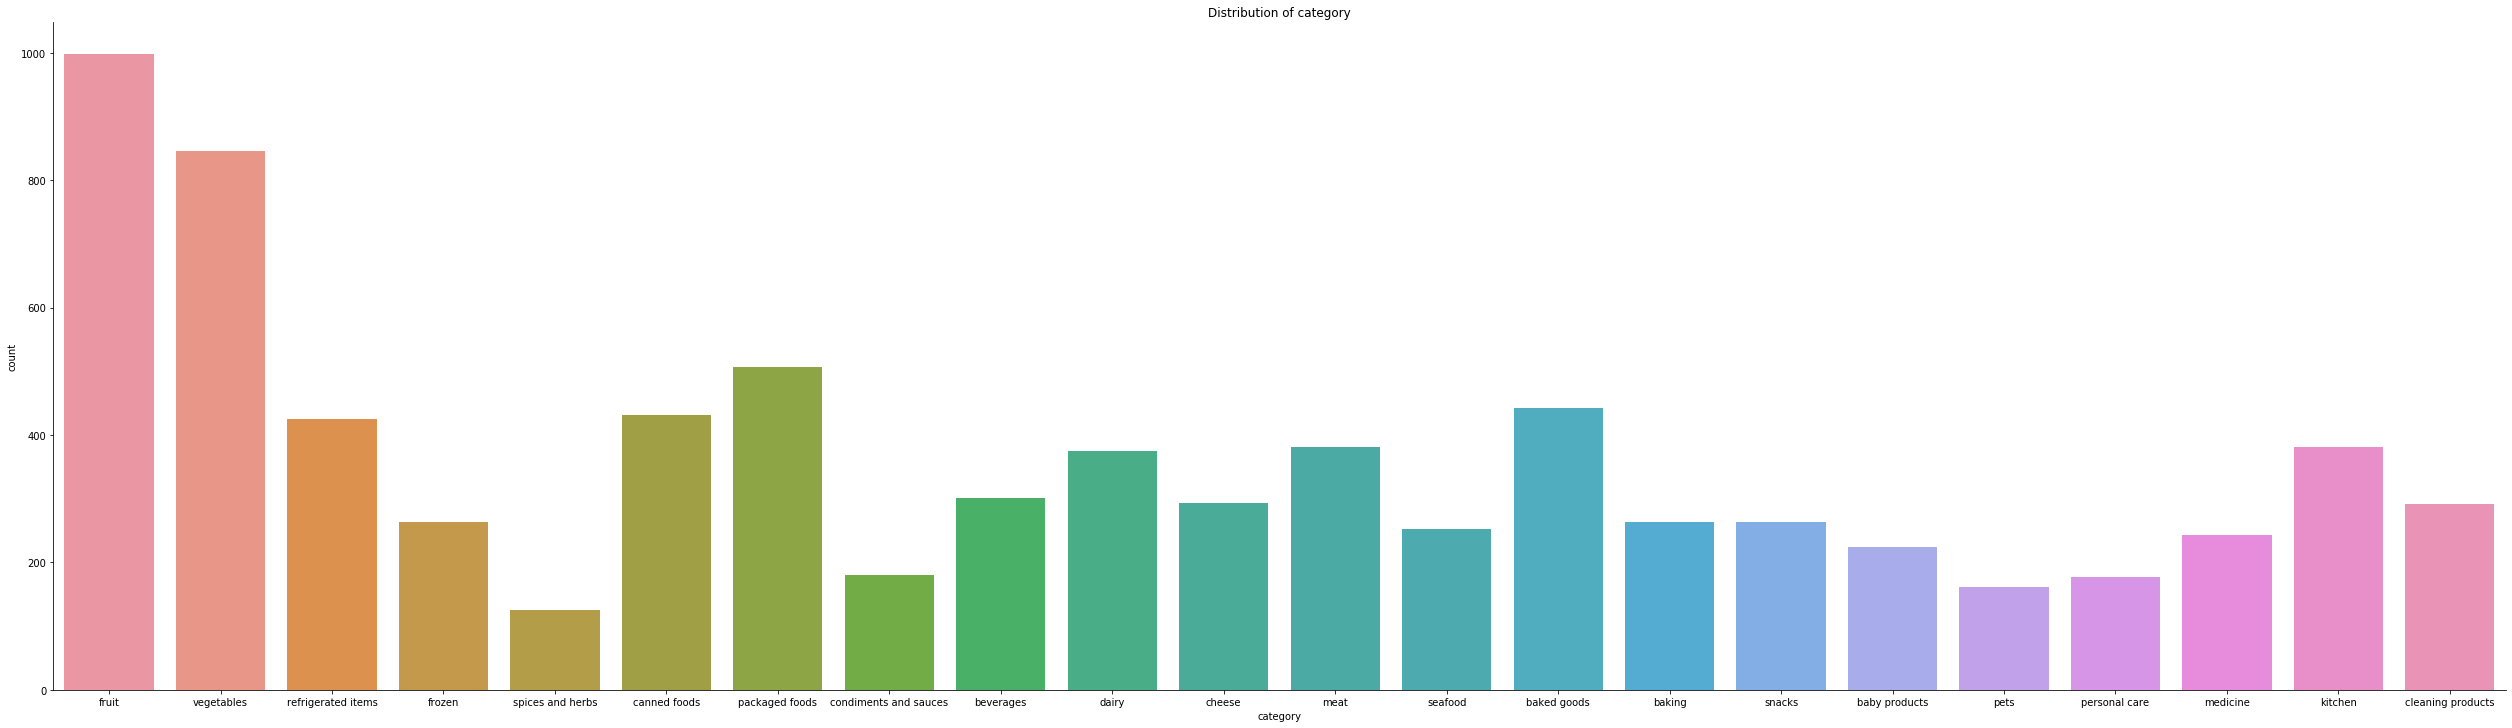

In [90]:
plot_categorical_distribution(df, 'category', height=10, aspect=3.5)

In [91]:
get_unique_values(df, 'customer_type')

Column: customer_type has 5 unique values

non-member    1601
standard      1595
premium       1590
basic         1526
gold          1517
Name: customer_type, dtype: int64


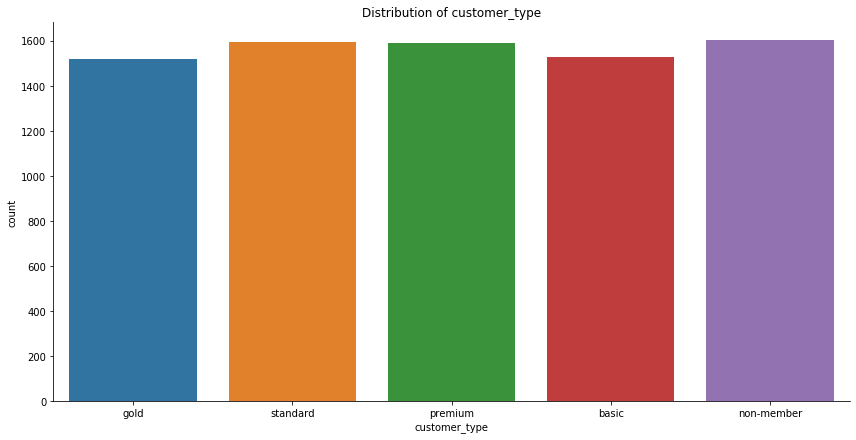

In [92]:
plot_categorical_distribution(df, 'customer_type', height=6, aspect=2)

From this sample of data, non-members appear to be the most frequent type of customers, closely followed by standard and premium customers

In [93]:
get_unique_values(df, 'payment_type')

Column: payment_type has 4 unique values

cash           2027
credit card    1949
e-wallet       1935
debit card     1918
Name: payment_type, dtype: int64


There are 4 unique values for payment_type, and they seem to be quite evenly distributed once again

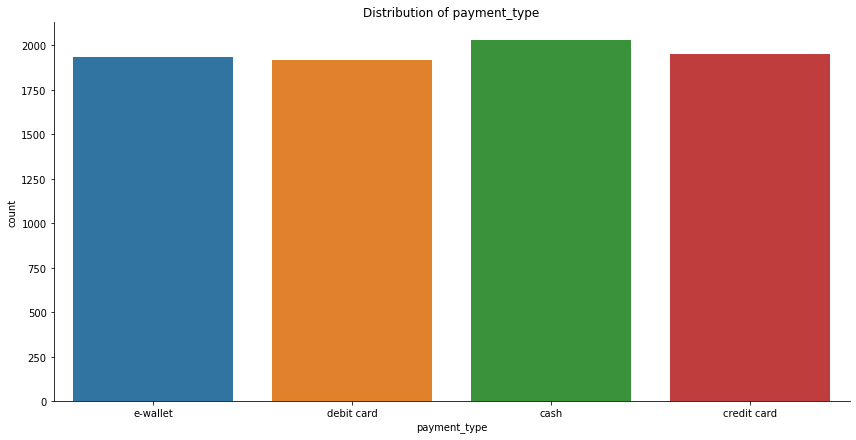

In [94]:
plot_categorical_distribution(df,'payment_type', height=6, aspect=2)

Interestingly, cash seems to be the most frequently used method of payment from this sample of data, with debit cards being the least frequent.

This dataset is a sample from 1 store across 1 week. So it will be interesting to see if the population sample follows similar patterns.

In [95]:
get_unique_values(df, 'timestamp')

Column: timestamp has 7738 unique values

2022-03-03 13:28:14    2
2022-03-06 16:15:12    2
2022-03-04 14:55:40    2
2022-03-02 15:06:09    2
2022-03-01 13:35:27    2
                      ..
2022-03-06 15:51:22    1
2022-03-07 14:56:20    1
2022-03-04 09:35:00    1
2022-03-02 12:15:01    1
2022-03-06 16:14:20    1
Name: timestamp, Length: 7738, dtype: int64


The column named timestamp appears to be categorical, but in actual fact it's not. This is a datetime, following the format of 2022-03-01 10:00:45 = YYYY-MM-DD HH:MM:SS. Therefore, we must transform this column to reflect its true form.

A helper function is provided below to convert the column into a datetime column.

In [96]:
def convert_to_datetime(data: pd.DataFrame = None, column: str = None):

  dummy = data.copy()
  dummy[column] = pd.to_datetime(dummy[column], format='%Y-%m-%d %H:%M:%S')
  return dummy

In [97]:
df = convert_to_datetime(df, 'timestamp')

In [98]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7829 entries, 0 to 7828
Data columns (total 9 columns):
transaction_id    7829 non-null object
timestamp         7829 non-null datetime64[ns]
product_id        7829 non-null object
category          7829 non-null object
customer_type     7829 non-null object
unit_price        7829 non-null float64
quantity          7829 non-null int64
total             7829 non-null float64
payment_type      7829 non-null object
dtypes: datetime64[ns](1), float64(2), int64(1), object(5)
memory usage: 550.6+ KB


In [99]:
df['hour'] = df['timestamp'].dt.hour

In [100]:
df.head()

,transaction_id,timestamp,product_id,category,customer_type,unit_price,quantity,total,payment_type,hour
0,a1c82654-c52c-45b3-8ce8-4c2a1efe63ed,2022-03-02 09:51:38,3bc6c1ea-0198-46de-9ffd-514ae3338713,fruit,gold,3.99,2,7.98,e-wallet,9
1,931ad550-09e8-4da6-beaa-8c9d17be9c60,2022-03-06 10:33:59,ad81b46c-bf38-41cf-9b54-5fe7f5eba93e,fruit,standard,3.99,1,3.99,e-wallet,10
2,ae133534-6f61-4cd6-b6b8-d1c1d8d90aea,2022-03-04 17:20:21,7c55cbd4-f306-4c04-a030-628cbe7867c1,fruit,premium,0.19,2,0.38,e-wallet,17
3,157cebd9-aaf0-475d-8a11-7c8e0f5b76e4,2022-03-02 17:23:58,80da8348-1707-403f-8be7-9e6deeccc883,fruit,gold,0.19,4,0.76,e-wallet,17
4,a81a6cd3-5e0c-44a2-826c-aea43e46c514,2022-03-05 14:32:43,7f5e86e6-f06f-45f6-bf44-27b095c9ad1d,fruit,basic,4.49,2,8.98,debit card,14


In [101]:
get_unique_values(df, 'hour')

Column: hour has 11 unique values

11    738
16    730
18    727
10    723
12    721
9     718
19    709
14    702
17    699
13    693
15    669
Name: hour, dtype: int64


From this we can see that the 11th, 16th and 18th hour of the day are the top 3 hours of the day for transactions being processed. This is interesting, this would suggest that their busiest times of day may be just before lunch, and as people are on the way home from work. Once again, this is a small sample of data, so we can't make assumptions on the population sample of data, but it gives us insights to go back to the business with.

Section 5 - Correlations
By now, you should have a good understanding of all the columns within the dataset, as well as the values that occur within each column. One more thing that we can do is to look at how each of the numerical columns are related to each other.

To do this, we can use correlations. Correlations measure how each numeric column is linearly related to each other. It is measured between -1 and 1. If a correlation between 2 columns is close to -1, it shows that there is a negative correlation, that is, as 1 increases, the other decreases. If a correlation between 2 columns is close to 1, it shows that they are positively correlated, that is, as 1 increases, so does the other. Therefore, correlations do not infer that one column causes the other, but it gives us an indication as to how the columns are linearly related.

In [102]:
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm')

,unit_price,quantity,total,hour
unit_price,1,0.0245878,0.792018,0.0108422
quantity,0.0245878,1,0.521926,-0.00840984
total,0.792018,0.521926,1,0.0103539
hour,0.0108422,-0.00840984,0.0103539,1


From this correlation matrix, we can see that the only columns that have a high correlation are Unit_Price and Total. This is understandable because total is calculated used Unit_Price.

All the other correlations are close to 0, indicating that there is not a significant positive or negative correlation between the numeric variables.

We have completed an initial exploratory data analysis on the sample of data provided. We should now have a solid understanding of the data.

The client wants to know

"How to better stock the items that they sell"
From this dataset, it is impossible to answer that question. In order to make the next step on this project with the client, it is clear that:

We need more rows of data. The current sample is only from 1 store and 1 week worth of data
We need to frame the specific problem statement that we want to solve. The current business problem is too broad, we should narrow down the focus in order to deliver a valuable end product
We need more features. Based on the problem statement that we move forward with, we need more columns (features) that may help us to understand the outcome that we're solving for